# 0 &emsp; First simulations with PV_ICE <a id='0'></a>
***

This notebook will guide you through the basic functionality of PV_ICE. Once you are done with this tutorial, you will be able to:
* Set up a PV_ICE simulation and create scenarios.
* Compute mass flow calculations.
* Plot results.

Please refer to the [PV_ICE documentation page](https://pv-ice.readthedocs.io/en/latest/index.html) to get a complete insight of the package.

## 0.1 &emsp; Simulation Setup <a id='0.1'></a>

To setup a PV_ICE simulation we need (1) import necessary packages, (2) create simulation folder path, (3) create a baseline path.

First let's import the necessary libraries for this notebook:

In [1]:
import os # Creates and removes a directory (folder), fetch its contents, change and identify the current directory
from pathlib import Path
import PV_ICE # Load PV_ICE package

Let's set the folder where the **simulation** will be saved. By default, this is the TEMP folder in the PV_ICE distribution, however, we have created a TEMP folder in the present folder for simplicity.

<div class="alert alert-block alert-info">
<b>Tip:</b> The lines below find the location of the folder relative to this Jupyter Journal, where `Path().resolve()` points at the current notebook absolute location, add `.parent` to navigate to previous folders and `/ 'folder' / ...` to navigate within a specific folder.. You can alternatively point to an empty directory (it will open a load GUI Visual Interface) or specify any other directory in your computer.
</div>

Using the same logic, setup the **baselines** folder. This is where all the baselines are stored in .csv format. A folder with multiple baselines can be found in the PV_ICE repository (PV_ICE/PV_ICE/baselines), you can always copy this folder and put it in a path of your choice. You may also create your own baselines (following the key structure used in PV_ICE for scenarios and materials).

In [2]:
testfolder = str(Path().resolve() / 'TEMP') # Path to the simulation folder.

baselinesfolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'baselines')  # Path to baselines and data.

print ("Your simulation will be stored in %s" % testfolder)
print ("Your baselines are stored in %s" % baselinesfolder)

Your simulation will be stored in /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP
Your baselines are stored in /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/PV_ICE/baselines


## 0.2.  Create Simulation Object <a id='0.2'></a>

The simulation object will create a container for all the different scenario(s) you might want to test. The method Simulation requires two inputs:
* `name` for the simulation (in this example `'Simulation_1'`), if no name is given the program will autogenerate a default name with the current date
* `path`, this is where we insert `testfolder` defined above, we named this simulation object `r1`

In [3]:
r0 = PV_ICE.Simulation(name='Simulation_1', path=testfolder); # Is it possible to define more than one simulation here?
print(r0.name) # Shows the name of the simulation object
print(r0.path) # Shows the path of the simulation object

path = /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP
Simulation_1
/Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP


<div class="alert alert-block alert-warning">
<b>Warning:</b> If you re-run this cell it will mess with the path folder location by appending parent folders. To fix this, restart kernel and clear outputs!
</div>

## 0.3 &emsp; Specify Baseline Scenario <a id='1.3'></a>

In baselines there are scenarios representing average module for various situations, e.g. throughout US history. Let us load scenario `baseline_modules_US.csv` in the path and name it `standard_0`:

In [4]:
r0.createScenario(name='standard_0', file=baselinesfolder + '/baseline_modules_US.csv') # No popup in jupyter nor Code if I only provide directory IsADirectoryError: [Errno 21] Is a directory

If a file is not provided, the automatic file loader will pop-up. # This one is in development

## 0.4 &emsp; Specify Material(s) <a id='0.4'></a>

You can add materials to your simulation. In this example we will be adding `'glass'`.

In [6]:
r0.scenario['standard_0'].addMaterial('glass', file=baselinesfolder + '/baseline_material_glass.csv')

## 0.5 &emsp; Run the Mass Flow with Circulkar Pathways Calculations <a id='0.5'></a>

In [10]:
r0.calculateMassFlow()

Working on Scenario:  standard_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [12]:
r0.scenario['standard_0'].data.head()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_Repair,mod_MerchantTail,...,EOL_BS_Year50,EOL_BS_Year51,EOL_BS_Year52,EOL_BS_Year53,EOL_BS_Year54,EOL_BS_Year55,EOL_Landfill0,EOL_BadStatus,EOL_PG,EOL_PATHS
0,1995,12.500000,12.50,16.0,21.0,0.55,10.0,98.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,1996,9.667667,12.70,16.0,21.0,0.55,10.0,98.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.284603,0.050224,0.0,0.050224
2,1997,11.622000,12.88,19.0,23.0,0.55,15.0,98.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.002568,1.059277,0.0,1.059277
3,1998,11.781000,13.06,19.0,23.0,0.55,15.0,98.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,34.689422,6.121663,0.0,6.121663
4,1999,16.884667,13.24,19.0,23.0,0.55,15.0,98.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,116.130016,20.493532,0.0,20.493532


## 0.6 &emsp; Plot Mass Flow Results <a id='1.6'></a>

PV_ICE can also plot the massflow simulation results so you can visualize and interpret the results of your simulation. To see the plotting options, run the plotting method with no inputs:

In [13]:
r0.plotScenariosComparison()

Choose one of the keywords:  ['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50', 'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff', 'mod_Repair', 'mod_MerchantTail', 'mod_EOL_collection_eff', 'mod_EOL_pg0_resell', 'mod_EOL_pg1_landfill', 'mod_EOL_pg2_stored', 'mod_EOL_pg3_reMFG', 'mod_EOL_pg4_recycled', 'mod_EOL_reMFG_yield', 'mod_EOL_sp_reMFG_recycle', 'mod_EOL_pb1_landfill', 'mod_EOL_pb2_stored', 'mod_EOL_pb3_reMFG', 'mod_EOL_pb4_recycled', 'irradiance_stc', 'Area', 'Yearly_Sum_Area_disposedby_Failure', 'Yearly_Sum_Power_disposedby_Failure', 'Yearly_Sum_Area_disposedby_ProjectLifetime', 'Yearly_Sum_Power_disposedby_ProjectLifetime', 'Yearly_Sum_Area_disposed', 'Yearly_Sum_Power_disposed', 'landfilled_noncollected', 'Repaired_[W]', 'Repaired_Area', 'Resold_Area', 'Resold_[W]', 'Cumulative_Active_Area', 'Installed_Capacity_[W]', 'Status_BAD_Area', 'Status_BAD_[W]', 'Area_for_EOL_pathsG', 'Power_for_EOL_pathsG', 'Landfill_0', 'WeibullParams', 

From this list, select the one that fits your study and select the type of plotting method. There are BLEH plotting options:
* `plotScenariosComparison`:
* `plotMaterialComparisonAcrossScenarios`:
* `plotMetricResults`: You can select the following keyword options: 'VirginStock', 'WasteALL', 'WasteEOL', 'WasteMFG'
* `plotMaterialResults`:
* `plotInstalledCapacityResults`:


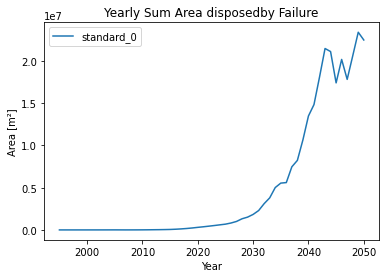

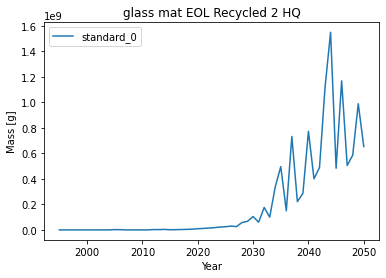

In [14]:
r0.plotScenariosComparison('Yearly_Sum_Area_disposedby_Failure') # This one is missing units.
r0.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_EOL_Recycled_2_HQ')

We are starting to get an idea of what is going on by looking at these graphs, huh? In the top graph, we can see how the amount of modules that are disposed due to failure ramps up exponentially on 2030. Could you guess why?
The bottom graphs shows a similar trend but with amount of recycled glass (spikes?). These plots could be more useful if we compare different scenarios and materials. Let's see how is that done! Go ahead and move on the next [tutorial](./02_Two_Scenarios_Two_Materials.ipynb) if you want to find out how!.

In [16]:
import plotly
r0.plotMetricResults() # This one requires plotly, it is not included on the import list. It also give error of no 'USyearly' attribute in 'Simulation' object. 

ModuleNotFoundError: No module named 'plotly'